#### Useful references

https://www.tensorflow.org/versions/r1.15/api_docs/python/tf



### module imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd

import tensorflow as tf

np.set_printoptions(suppress=True, precision=5)

### Create and visualize data

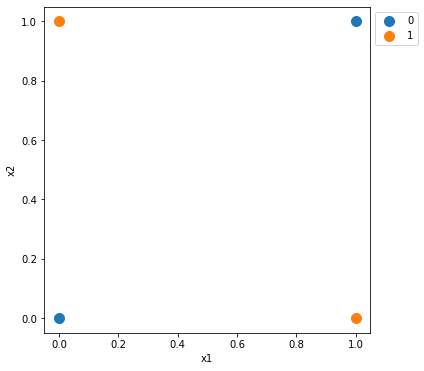

In [2]:
# generate the data set

x = np.array([[0,0,1,1],[0,1,0,1]])
ns = 4

sg = 0.0
# ns = 100
# x = rnd.randint(2,size=(2,ns))

xn = x + sg*rnd.randn(2,ns)
y = np.logical_xor(x[0],x[1])

plt.figure(figsize=(8,6))
plt.scatter(xn[0,y==0],xn[1,y==0], label='0', s=100)
plt.scatter(xn[0,y==1],xn[1,y==1], label='1', s=100)
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('square')
plt.legend(bbox_to_anchor=(1,1),loc='upper left' )
plt.show()

### XOR with Tensorflow using ReLU

In [3]:
train_x = xn
train_y =y.reshape((1,-1))
print(train_x.shape)
print(train_y.shape)

(2, 4)
(1, 4)


In [4]:
# create the network
tf.reset_default_graph()

# placeholders for input / outputs
X = tf.placeholder(tf.float64, [2, None])
Y = tf.placeholder(tf.float64, [1, None])
learning_rate = tf.placeholder(tf.float64, shape=())

# weights
W1 = tf.Variable(tf.random_normal(shape=[2,2], dtype=tf.float64))
W2 = tf.Variable(tf.random_normal(shape=[1,2], dtype=tf.float64))

# biases
b1 = tf.Variable(tf.zeros(shape=[2,1], dtype=tf.float64))
b2 = tf.Variable(tf.zeros(1, dtype=tf.float64))

init = tf.global_variables_initializer()

# neurons and output
z = tf.matmul(W2, tf.nn.leaky_relu(tf.matmul(W1,X)+b1, alpha=0.05))+b2
y_out = tf.sigmoid(z)

# cost function
cost_func = -tf.reduce_sum(Y*tf.log(y_out)+(1-Y)*tf.log(1-y_out), axis=1)
cost_func2 = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(logits=z, labels=Y))

training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_func)

# saving node
saver  = tf.train.Saver()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
# function to train the model
def run_linear_model(learning_r, training_epochs, train_obs,
                    train_labels, debug=False):
    sess = tf.Session()
    sess.run(init)
    
    cost_history = np.empty(shape=[0], dtype = float)
    cost_history2 = np.empty(shape=[0], dtype = float)
    
    for epoch in range(training_epochs):
        [_, cost_,cost2_]=sess.run([training_step,cost_func, cost_func2],
                                   feed_dict = {X: train_obs, Y:train_labels,
                                    learning_rate: learning_r})
        
        cost_history = np.append(cost_history, cost_)
        cost_history2 = np.append(cost_history2, cost2_)
        
        if (epoch%1000 == 0 ) & debug:
            print('Epoch ', epoch, "cost J = ", cost_, cost2_)
  
    # save the trained network
    save_path = saver.save(sess, 'trained_model.ckpt')
    
    return sess, cost_history,cost_history2, save_path

In [19]:
# run the training function
sess, cost_history,cost_history2, spath = run_linear_model(learning_r=0.1, training_epochs= 10001,
                                     train_obs=train_x, train_labels=train_y,
                                     debug=True)

Epoch  0 cost J =  [2.85464] 2.8546390152972205
Epoch  1000 cost J =  [2.7726] 2.7725979827412908
Epoch  2000 cost J =  [2.7726] 2.772597141674482
Epoch  3000 cost J =  [2.7726] 2.7725963871535417
Epoch  4000 cost J =  [2.7726] 2.7725957087039133
Epoch  5000 cost J =  [2.7726] 2.772595097356558
Epoch  6000 cost J =  [2.77259] 2.7725945453957195
Epoch  7000 cost J =  [2.77259] 2.772594046154608
Epoch  8000 cost J =  [2.77259] 2.7725935938488946
Epoch  9000 cost J =  [2.77259] 2.772593183440272
Epoch  10000 cost J =  [2.77259] 2.7725928105240323


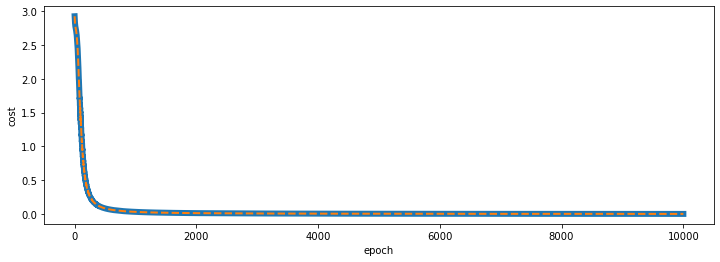

In [7]:
# plot the cost
plt.figure(figsize=(12,4))
plt.plot(cost_history, lw=6)
plt.plot(cost_history2,lw=2, linestyle='dashed')
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()

In [8]:
ntest = 100
sg=0.1
x_test = rnd.randint(2,size=(2,ntest))
y_test = np.logical_xor(x_test[0],x_test[1])

x_test = x_test + sg*rnd.randn(2,ntest)

In [9]:
# predict the output
y_tf = sess.run(y_out, {X: x_test})
y_thresh = (y_tf>=0.5).flatten()

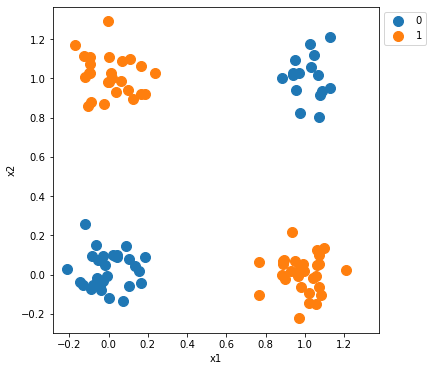

In [10]:
# plot the fit models
plt.figure(figsize=(8,6))
plt.scatter(x_test[0,y_thresh==0],x_test[1,y_thresh==0], label='0', s=100)
plt.scatter(x_test[0,y_thresh==1],x_test[1,y_thresh==1], label='1', s=100)
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('square')
plt.legend(bbox_to_anchor=(1,1),loc='upper left' )
plt.show()

In [11]:
w1_trained = sess.run(W1)
b1_trained = sess.run(b1)
w2_trained = sess.run(W2)
b2_trained = sess.run(b2)

In [12]:
sess.close()

In [13]:
print(w1_trained)

[[4.43019 4.43021]
 [3.55362 3.55364]]


In [14]:
# restore the loaded network
sess_r = tf.Session()
saver.restore(sess_r, spath)

print("W1 trained\n",w1_trained)
print("W1 restored\n",sess_r.run(W1))

print("\nb1 trained\n",b1_trained)
print("b1 restored\n",sess_r.run(b1))

print("\nW2 trained\n",w2_trained)
print("W2 restored\n",sess_r.run(W2))

print("\nb2 trained\n",b2_trained)
print("b2 restored\n",sess_r.run(b2))

INFO:tensorflow:Restoring parameters from trained_model.ckpt
W1 trained
 [[4.43019 4.43021]
 [3.55362 3.55364]]
W1 restored
 [[4.43019 4.43021]
 [3.55362 3.55364]]

b1 trained
 [[-4.43003]
 [-0.0001 ]]
b1 restored
 [[-4.43003]
 [-0.0001 ]]

W2 trained
 [[-7.48625  4.60918]]
W2 restored
 [[-7.48625  4.60918]]

b2 trained
 [-8.09942]
b2 restored
 [-8.09942]


In [15]:
# predict the output
y_tf_r = sess_r.run(y_out, {X: x_test})
y_thresh_r = (y_tf_r>=0.5).flatten()

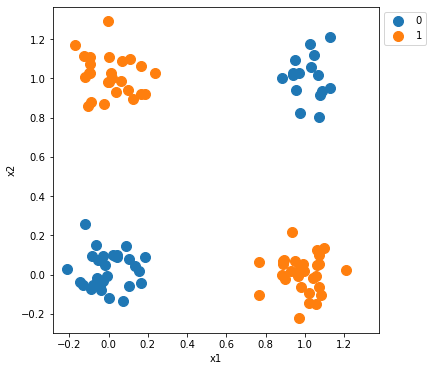

In [16]:
# plot the fit models
plt.figure(figsize=(8,6))
plt.scatter(x_test[0,y_thresh_r==0],x_test[1,y_thresh_r==0], label='0', s=100)
plt.scatter(x_test[0,y_thresh_r==1],x_test[1,y_thresh_r==1], label='1', s=100)
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('square')
plt.legend(bbox_to_anchor=(1,1),loc='upper left' )
plt.show()

In [17]:
sess_r.close()